# Lab - Customer Analysis Round 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Processing Data

numerical = pd.read_csv('datalab2_numerical.csv')

In [3]:
numerical_x = numerical.drop(['Unnamed: 0','total claim amount','month','number of open complaints','number of policies'],axis=1)
numerical_x

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception
0,4809.216960,48029,61,7.0,52
1,2228.525238,0,64,3.0,26
2,14947.917300,22139,100,34.0,31
3,22332.439460,49078,97,10.0,3
4,5035.035257,37405,63,8.0,99
...,...,...,...,...,...
9129,2771.663013,59855,74,30.0,82
9130,19228.463620,0,187,14.0,32
9131,5259.444853,61146,65,7.0,68
9132,23893.304100,39837,201,11.0,63


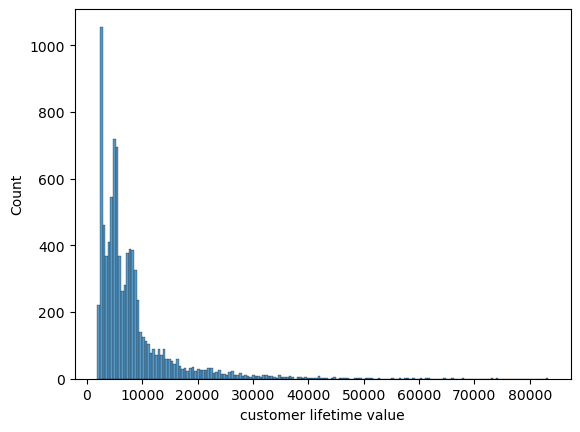

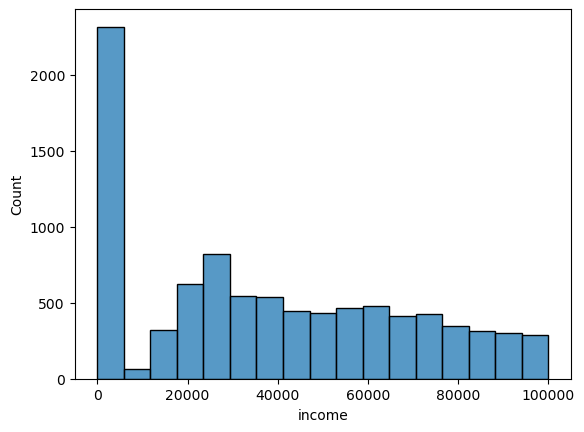

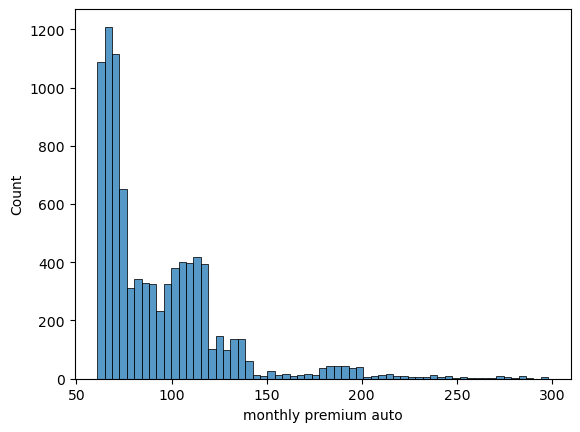

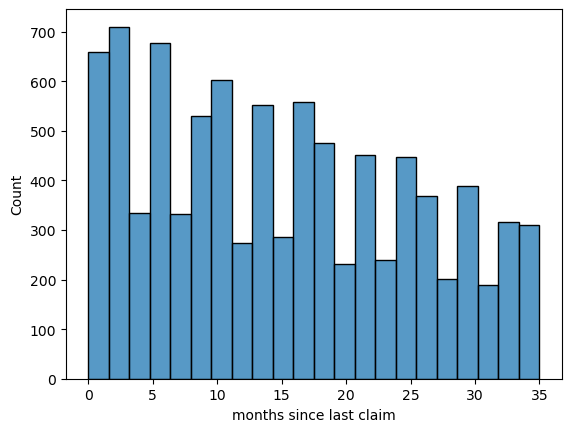

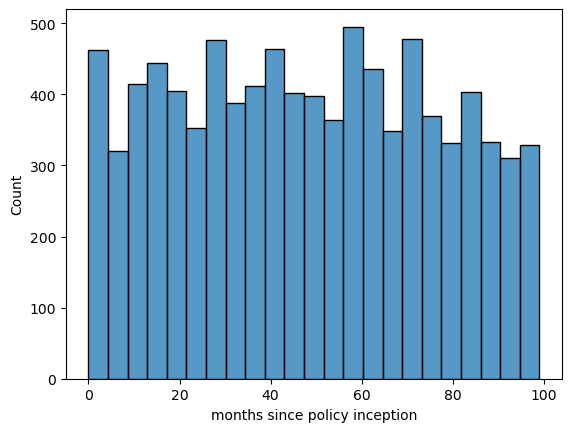

In [4]:
for col in numerical_x.columns:
    sns.histplot(numerical_x[col])
    plt.show()

In [5]:
numerical_x.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.00000
monthly premium auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.00000
months since last claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.00000
months since policy inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.00000


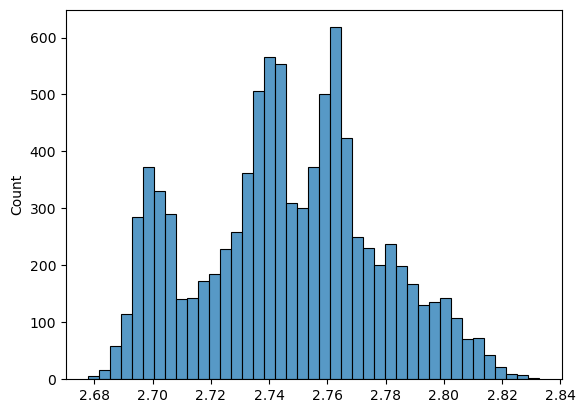

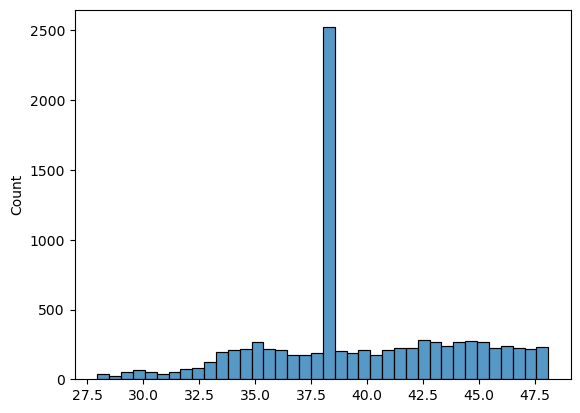

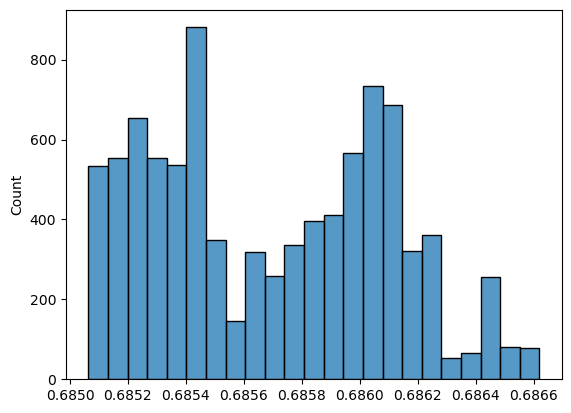

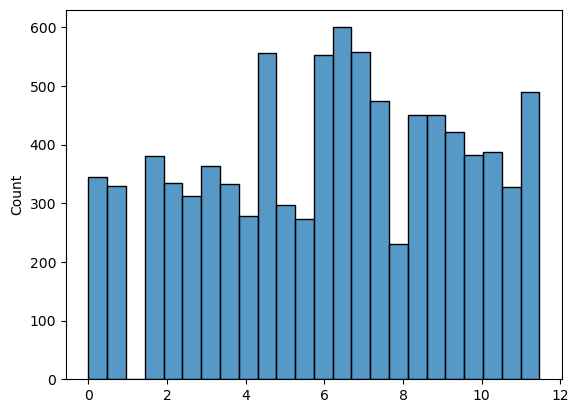

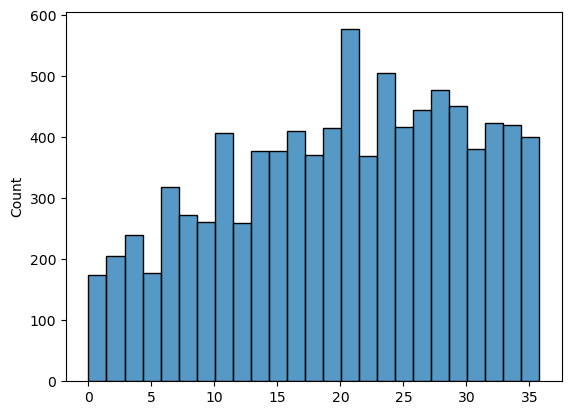

In [6]:
for col in numerical_x.columns:
    numerical_x[col]=numerical_x[col].replace(0,numerical_x[col].mean())
    arr, lmbda=stats.boxcox(numerical_x[col])
    numerical_x[col]=arr
    sns.histplot(arr)
    plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

x_names = numerical_x.columns
numerical_x = pd.DataFrame(StandardScaler().fit(numerical_x).transform(numerical_x))
numerical_x.columns = list(x_names)

In [8]:
numerical_x

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception
0,-0.334914,0.218967,-1.546873,-0.819065,0.214078
1,-1.864614,-0.295792,-1.260678,-1.462015,-0.743570
2,1.293258,-1.333005,0.628149,1.623408,-0.543420
3,1.732720,0.265959,0.534556,-0.441404,-1.919838
4,-0.255895,-0.309653,-1.352362,-0.686531,1.645332
...,...,...,...,...,...
9129,-1.388766,0.707771,-0.507518,1.340769,1.156594
9130,1.576001,-0.295792,1.862420,-0.007926,-0.504540
9131,-0.181957,0.756361,-1.172446,-0.819065,0.731847
9132,1.800855,-0.179044,1.945201,-0.326883,0.574219


In [9]:
numerical_x.to_csv('datalab2_numerical_x.csv')